<a href="https://colab.research.google.com/github/slachitoff/CS-GY-6613-Assignments/blob/main/CS_GY_6613_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1a:
In a private subreddit people are posting their opinions on the CEO of the company you work for. Lets assume that the employees that are posting are random logging in to that subreddit and that each post indicates whether the employee approves or not the job that the CEO is doing. Let $x_i$ be the binary random variable where $x_i = 1$ indicates approval. You can assume that 
 is distributed according to a Bernoulli distribution with parameter $p = 1/2$.
.

Your job is to sample $n = 50$ posts and estimate the approval rate of the CEO by considering the statistics of $y = x_1 + x_2 + ⋯ + x_n$. What is the probability that 25 employees approve the CEO?

The Binomial distribution, a generalization of the Bernoulli distribution to a distribution over $n$ independent Bernoulli trials, can be used here. The Binomial distribution can be expressed as: $p(m \mid N, \mu)= {N\choose m} \mu^m (1 - \mu)^{N-m}$ where we are interested in the probability of obverving $m$ occurences of X = 1 in a set of $N$ samples where $p(X = 1) = \mu \in [0, 1]$.

Substituting our values of interest we are given:

$p(25 \mid 50, 0.5) {50\choose 25}0.5^{25}(1-0.5)^{50-25}$

$=p(25 \mid 50, 0.5) {50!\over 25!(50-25)!} 0.5^{25}(0.5)^{25}$

$=p(25 \mid 50, 0.5) {50!\over 25!(25)!} 0.25^{25}$

$= 0.11227517265$

# Question 1b:

Following your findings in Q1a, read about the Central Limit Theorem and recognize that

\begin{equation}
z = {y-\mu_1\over\sigma_2}
\end{equation}

is normally distributed with mean 0 and variance 1. 

Can you find the probability that 25 employees approve the CEO using the Gaussian approximation?



For unvariate random variables, the cumulative distribution for a Gaussian density is given by:


\begin{equation}
p(m \mid \mathbb{E}[m] , \mathbb{V}[m])= \int_{-∞}^{m}{1 \over {\sqrt{2\pi \mathbb{V}[m]}}} \exp \begin{pmatrix} {-{(m-\mathbb{E}[m])^2\over 2\mathbb{V}[m]}} \end{pmatrix}
\end{equation}

Where

$\mathbb{E}[m] = N\mu$
and
$\mathbb{V}[m] = N\mu(1-\mu)$.


Plugging in the values from Q1a we get:

$\mathbb{E}[m] = 50(0.5) = 25$

and

$\mathbb{V}[m] = 50(0.5)(1-0.5) = 12.5$

Because a Gaussian distribution is continuous, and the binomial is not, we must include the continuity correction factor. In this case, we are using $p(24.5 < m < 25.5)$ to approximate $p(m=25)$. Plugging in our values for 

$p(24.5 < m < 25.5\mid 25 , 12.5)= \int_{-∞}^{25.5}{1 \over {\sqrt{2\pi (12.5)}}} \exp \begin{pmatrix} {-{(25.5-25)^2\over 2(12.5)}} \end{pmatrix} - \int_{-∞}^{24.5}{1 \over {\sqrt{2\pi (12.5)}}} \exp \begin{pmatrix} {-{(m-25)^2\over 2(12.5)}} \end{pmatrix}$

$\hspace{6.5cm} = 2.84873 - 2.73702$

$\hspace{6.5cm} = 0.11171$



# Question 2:

A sequential experiment involves repeatedly drawing a ball from one of the two urns, noting the number on the ball and replacing the ball in the urn. Urn 0 contains a ball with the number 0 and two balls with the number 1. Urn 1 contains five balls with the number 0 and one ball with the number 1.

The urn from which the first ball is drawn is selected by flipping a fair coin. Urn 0 is used if the outcome is H and urn 1 is used if the outcome is T. **The urn used in a subsequent draws corresponds to the number on the ball drawn in the previous draw.**

What is the probability of a specific sequence of the numbers on drawn balls being 0011 ?



The probability of drawing a series of balls labeled "0011" can be expressed as $p(X=0011)$, which can be thought of as the sum of the probability of drawing the series of balls "0011" from urn 0 and the probability of drawing the balls "0011" from urn 1. Each of these proabilities are themselves the products of a series of probabilities of independent events. We will use $p(H)$ to express the probability of a coin flip landing on heads, and $p(T)$ for the probability of the coin landing on tails. $p(A)$ and $p(B)$ wll be used to denote the probabilities of pulling a "0" ball from urns 0 and 1, respectively. Likewise, $p(C)$ will be used to denote the probability of selecting a "1" ball from urn 0, and $p(D)$ for the probability of selecting a "1" ball from urn 1. Given this, we see that:

$p(X) = p(H)p(A)p(A)p(C)p(D) + p(T)p(B)p(A)p(C)p(D)$

$\hspace{1.2cm} = (\frac{1}{2})(\frac{1}{3})(\frac{1}{3})(\frac{2}{3})(\frac{1}{6}) + (\frac{1}{2})(\frac{5}{6})(\frac{1}{3})(\frac{2}{3})(\frac{1}{6})$

$\hspace{1.2cm} = (\frac{2}{324})+(\frac{5}{324})$

$\hspace{1.2cm} = (\frac{7}{324})$

$\hspace{1.2cm} = 0.02160493827$

# Question 3:

Referring to Example 6.6 of the Math for ML book, simulate and plot the bivariate normal distribution with the shown parameters using the Cholesky factorization for the simulation.

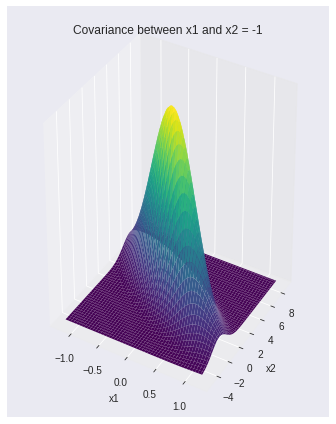

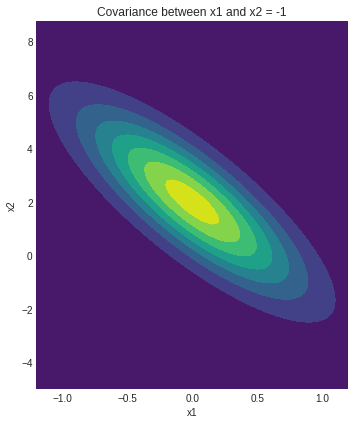

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
 
 
plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize']=14,6
fig = plt.figure()
 
# Initializing the random seed
random_seed=1000
 
# List containing the variance
# covariance values
cov_val = [-1]
 
# Setting mean of the distributino
# to be at (0,0)
mean = np.array([0,2])
 
# Storing density function values for
# further analysis
pdf_list = []
 
# Iterating over different covariance values
for idx, val in enumerate(cov_val):
     
    # Initializing the covariance matrix
    cov = np.array([[0.3, val], [val, 5]])
     
    # Generating a Gaussian bivariate distribution
    # with given mean and covariance matrix
    distr = multivariate_normal(cov = cov, mean = mean,
                                seed = random_seed)
     
    # Generating a meshgrid complacent with
    # the 3-sigma boundary
    mean_1, mean_2 = mean[0], mean[1]
    sigma_1, sigma_2 = cov[0,0], cov[1,1]
     
    x = np.linspace(-4*sigma_1, 4*sigma_1, num=100)
    y = np.linspace(-1*sigma_2, 1.75*sigma_2, num=100)
    X, Y = np.meshgrid(x,y)
     
    # Generating the density function
    # for each point in the meshgrid
    pdf = np.zeros(X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            pdf[i,j] = distr.pdf([X[i,j], Y[i,j]])
     
    # Plotting the density function values
    key = 131+idx
    ax = fig.add_subplot(key, projection = '3d')
    ax.plot_surface(X, Y, pdf, cmap = 'viridis')
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(f'Covariance between x1 and x2 = {val}')
    pdf_list.append(pdf)
    ax.axes.zaxis.set_ticks([])
 
plt.tight_layout()
plt.show()
 
# Plotting contour plots
for idx, val in enumerate(pdf_list):
    plt.subplot(1,3,idx+1)
    plt.contourf(X, Y, val, cmap='viridis')
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(f'Covariance between x1 and x2 = {cov_val[idx]}')
plt.tight_layout()
plt.show()

# Question 4:

1. Using the Kaggle API download [this](https://www.kaggle.com/datasets/new-york-city/nyc-east-river-bicycle-crossings) dataset and plot the histogram of the number of cyclists that cross the Brooklyn bridge per day.

2. Simulate the number of cyclists that cross the Brooklyn bridge per day using the Poisson distribution. Ensure that the simulated counts are similar distribution-wise to the observed counts.

### Historgram:

Saving nyc-east-river-bicycle-counts.csv to nyc-east-river-bicycle-counts.csv


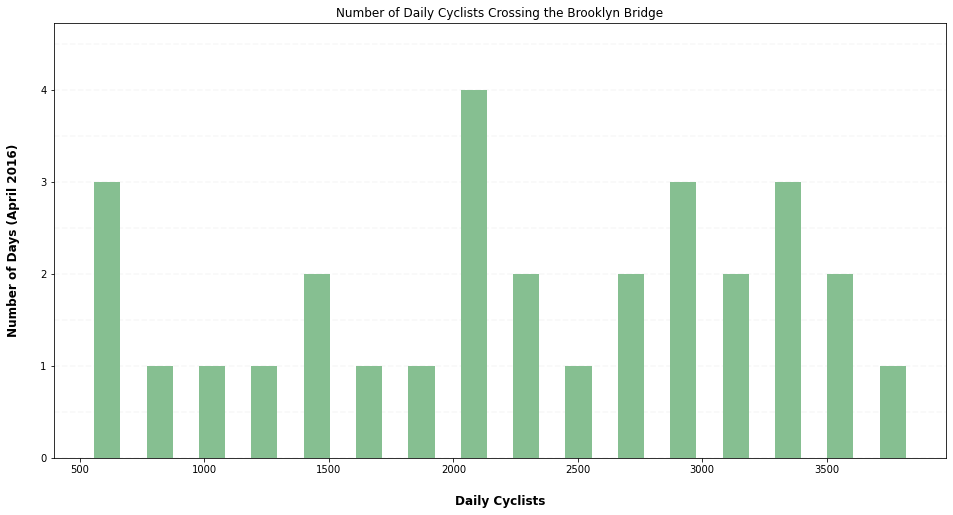

In [414]:
from google.colab import files
 
 
uploaded = files.upload()

import pandas as pd
import io
 
#df = pd.read_csv(io.BytesIO(uploaded['nyc-east-river-bicycle-counts.csv']))
#print(df)

df = pd.read_csv("nyc-east-river-bicycle-counts.csv")

ax = df.hist(column='Brooklyn Bridge', bins=16, grid=False, figsize=(16,8), color='#86bf91', zorder=2, rwidth=0.5)

ax = ax[0]
for x in ax:

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    x.set_title("Number of Daily Cyclists Crossing the Brooklyn Bridge")

    # Set x-axis label
    x.set_xlabel("Daily Cyclists", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Number of Days (April 2016)", labelpad=20, weight='bold', size=12)

    



###Poisson Distribution:

Text(0, 0.5, 'Number of Days (April 2016)')

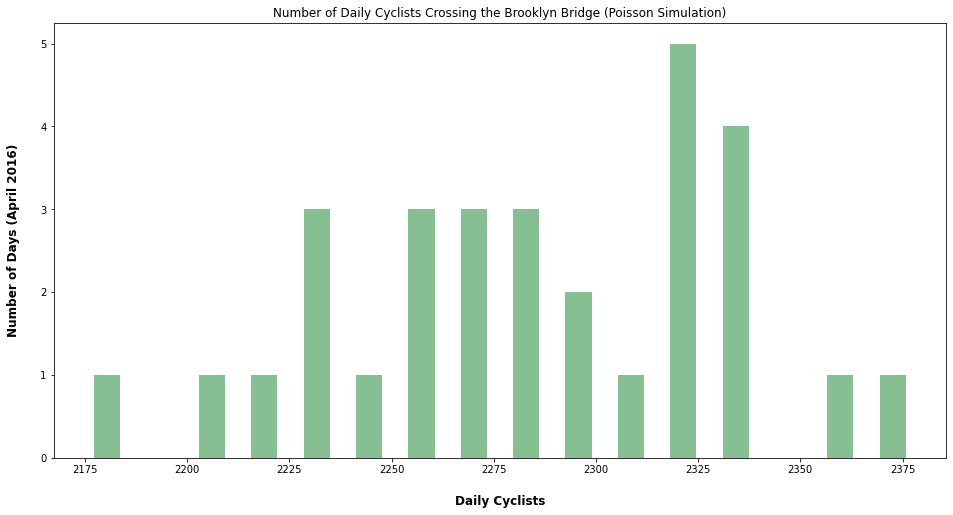

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
###################### Part 1 ##################
df = pd.read_csv("nyc-east-river-bicycle-counts.csv")
brooklyn = df["Brooklyn Bridge"]
mean = brooklyn.mean()

#Create simulated values of poisson distribution with the same mean
sim_vals = np.random.poisson(mean, brooklyn.size)

#Create simulated values of poisson distribution with the same mean
sim_vals = np.random.poisson(mean, brooklyn.size)

#Plot the histogram of simulated values
fig, ax = plt.subplots(figsize =(16, 8))

ax.hist(sim_vals, bins=16, color='#86bf91', zorder=2, rwidth=0.5)

ax.set_title("Number of Daily Cyclists Crossing the Brooklyn Bridge (Poisson Simulation)")

ax.set_xlabel("Daily Cyclists", labelpad=20, weight='bold', size=12)

ax.set_ylabel("Number of Days (April 2016)", labelpad=20, weight='bold', size=12)









# Question 5:

You are asked to stress test a cloud API endpoint and are told that the API exposes a database server that can be abstracted as an M/M/1 queue. Go through [this introductory](https://queue-it.com/blog/queuing-theory/) page to just understand the queuing domain and the notation M/M/1. Go also through the elements of the MM1 queue [here](https://en.wikipedia.org/wiki/M/M/1_queue). Make sure you click on the links and learn about the random process called Poisson process.

Your task is to simulate the behavior of the queue and plot the number of requests that are waiting in the queue as a function of time. You are given three arrival rates of the API requests $\lambda = [1, 2, 3]$ and the service time of the requests as an exponential random variable with rate $\mu = 4$.

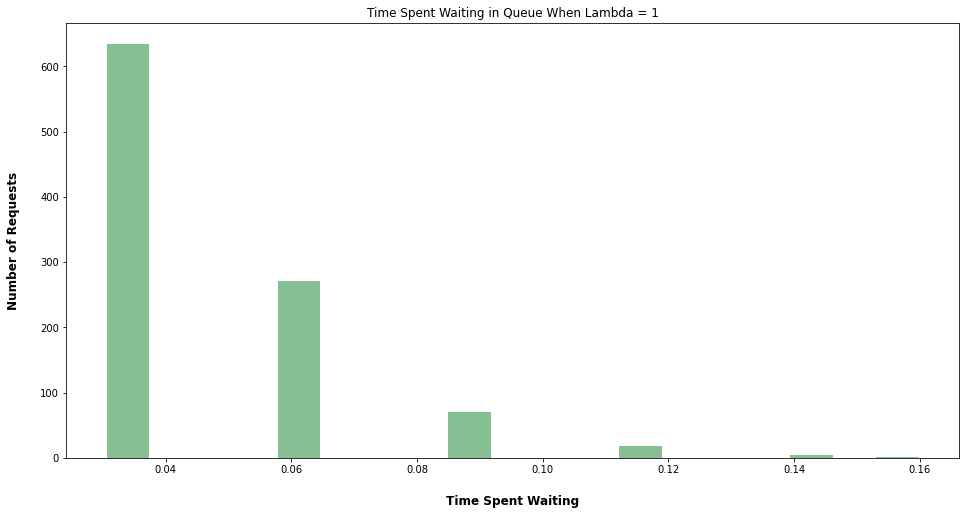

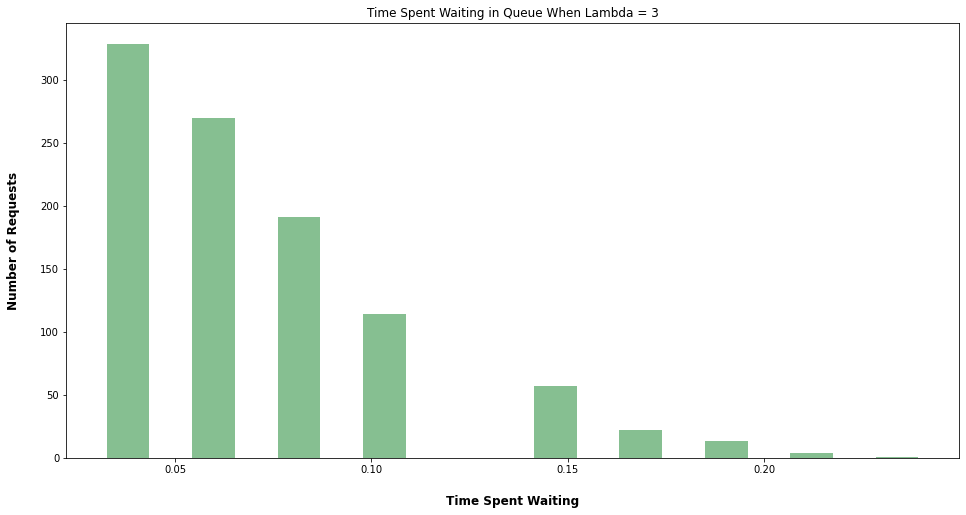

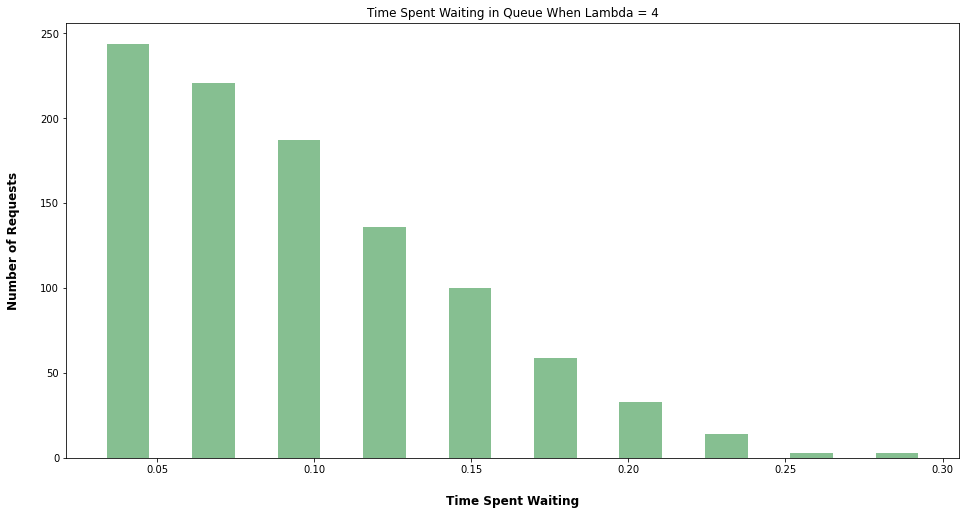

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
lambda_value = [1, 3, 4]
#lambda_value = [3]
for value in lambda_value:
  counter = 0
  queue_size = 0
  current_time= 0
  wait_times = []
  while counter < 1000 or queue_size > 0:
    queue_size += np.random.poisson(value, 1)
    if queue_size > 0:
      service_time = np.concatenate((service_time, np.random.exponential(.25, queue_size)))
      current_time += service_time[0]
      while queue_size >= current_time:
        wait_times.append(current_time.copy())
        counter += 1
        np.delete(service_time, 0)
        current_time += service_time[0]
        queue_size -= 1
      while queue_size < current_time and queue_size > 0:
        wait_times.append(current_time.copy())
        counter += 1
        np.delete(service_time, 0)
        queue_size = queue_size-1
        current_time -= 1
      if queue_size == 0:
        current_time = 0
      
  fig, ax = plt.subplots(figsize =(16, 8))

  ax.hist(wait_times, bins=10, color='#86bf91', zorder=2, rwidth=0.5)

  ax.set_title("Time Spent Waiting in Queue When Lambda = " + str(value))

  ax.set_xlabel("Time Spent Waiting", labelpad=20, weight='bold', size=12)

  ax.set_ylabel("Number of Requests", labelpad=20, weight='bold', size=12)


      

